In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
import math
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [2]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


### Exploartory data analysis
* Previously, we examined the various tables in the database to identtify kry variables, understand their relationsihps, amd determine which ones should be included in the final anlaysis.
* In this phase of EDA, we will anlyze the resultant taable to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before procedding with further analysis.
* 

In [3]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


In [4]:
# Distribution Plots for Numerical Columns
numerical_col = df.select_dtypes(exclude = 'object').columns
numerical_col

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalSalesQuantity', 'TotalExciseTax',
       'FreightCost', 'GrossProfit', 'ProfitMargin', 'StockTurnover',
       'SalesToPurchaseRatio'],
      dtype='object')

In [5]:
# Distribution Plots for Numerical Columns
numerical_col = df.select_dtypes(include = np.number).columns
numerical_col

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalSalesQuantity', 'TotalExciseTax',
       'FreightCost', 'GrossProfit', 'ProfitMargin', 'StockTurnover',
       'SalesToPurchaseRatio'],
      dtype='object')

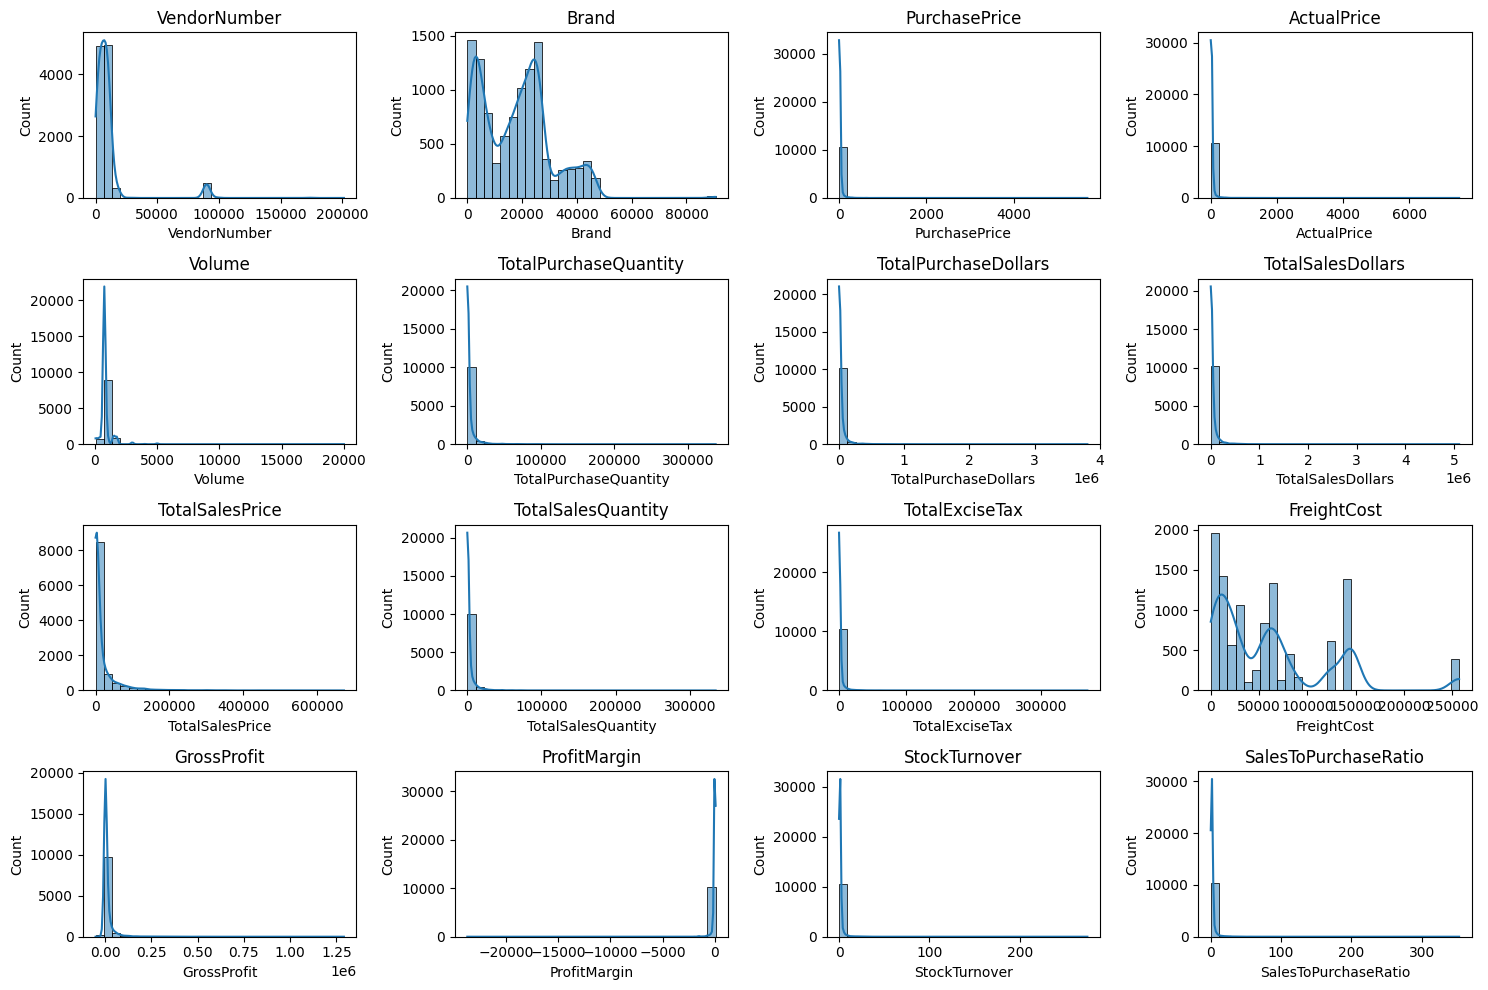

In [6]:
# Distribution Plots for Numerical Columns
numerical_col = df.select_dtypes(exclude = 'object').columns

# plt.figure( figsize = (15,10) )
# for i, col in enumerate(numerical_col):
#     plt.subplot(4,4, i+1)
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(col)

n_cols = 4 # 4 plots per row
n_rows = math.ceil(len(numerical_col)/ n_cols) 
# Suppose: 10 nume_col 4 plots per row 10 / 4 = 2.5 → need 3 rows 

f,axes = plt.subplots(n_rows, n_cols, figsize=(15,10)) # fig → the entire figure | axes → grid of individual plots (subplots)
axes = axes.flatten() # make indexing easy Initially, axes is 2D (rows × columns).

for ax,col in zip(axes, numerical_col): # stops automatically when pair ends
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.set_title(col)

for ax in axes[len(numerical_col):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

## To Analyze the outliers we use boxplot

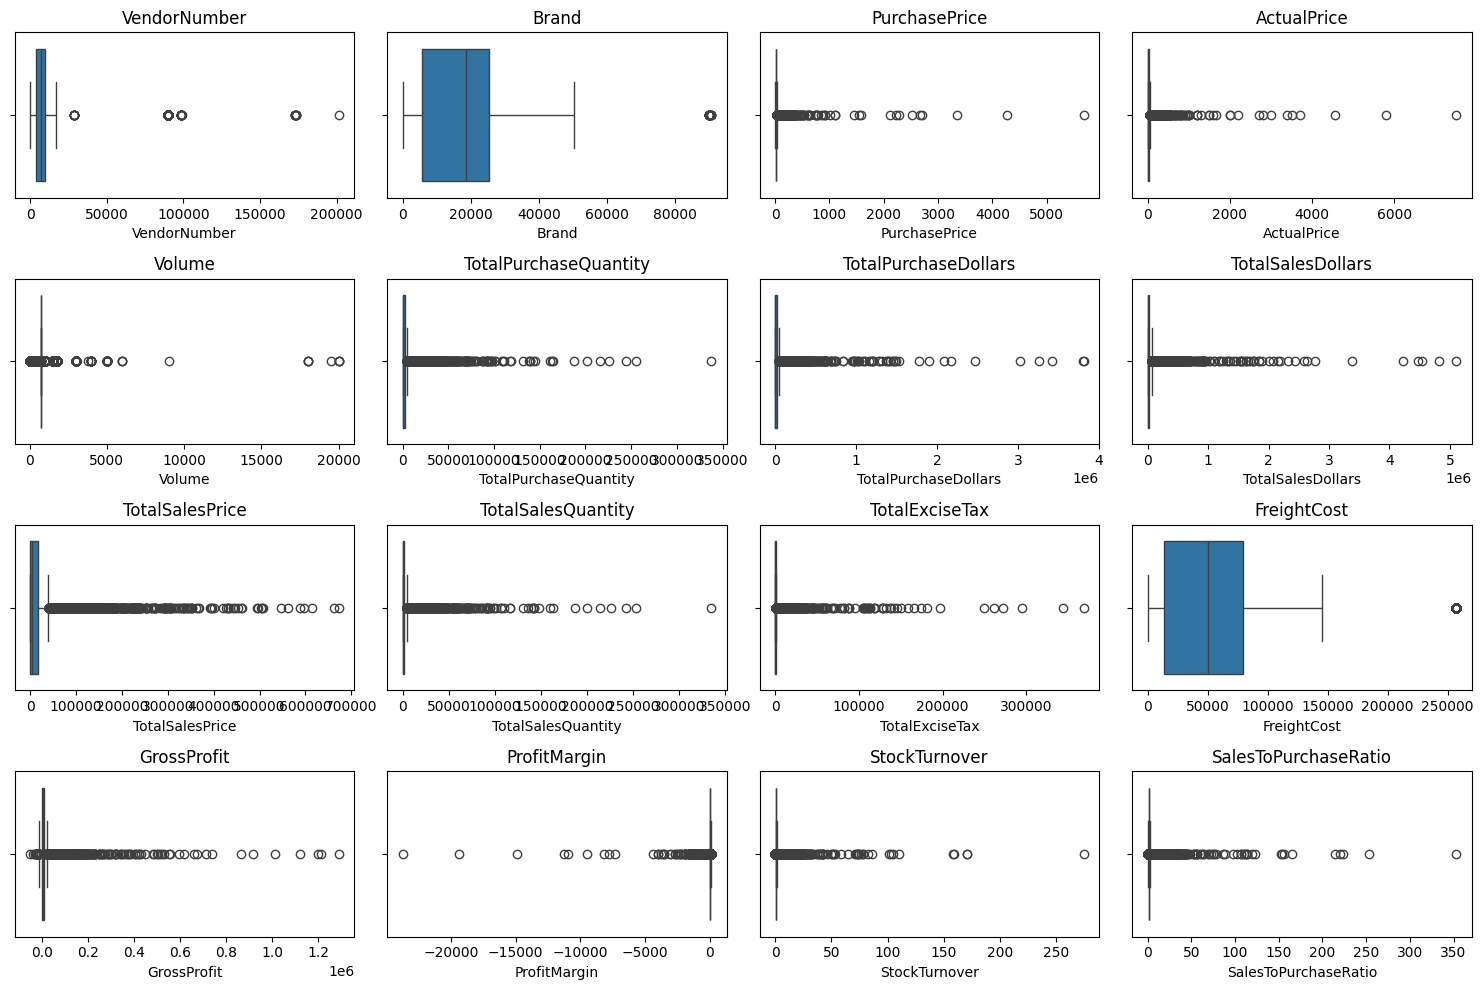

In [7]:
f,axes = plt.subplots(n_rows, n_cols, figsize=(15,10)) # fig → the entire figure | axes → grid of individual plots (subplots)
axes = axes.flatten() # make indexing easy Initially, axes is 2D (rows × columns).

for ax,col in zip(axes, numerical_col): # stops automatically when pair ends
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

for ax in axes[len(numerical_col):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

## Summary Statistics Insights

#### Negative & Aero Values:
* Gross Profit: Minimum value is  -52002.78, including losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
* Profit Margin: Has a minimum of -infinity, which suggests where revenue is zero or lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products purchased but never sold. These could be slow-moving or obsolete stock.

#### Outliers Indicated by High Standard Deviation'
* Purchase & actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than mean (24.39 & 35.64), indicating potential premium products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quanity for that product is higher than purchased qunatity due to either are being fulfilled from older stock.
  

df

In [8]:
df = pd.read_sql_query('''
SELECT * 
FROM vendor_sales_summary 
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0
''', conn)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


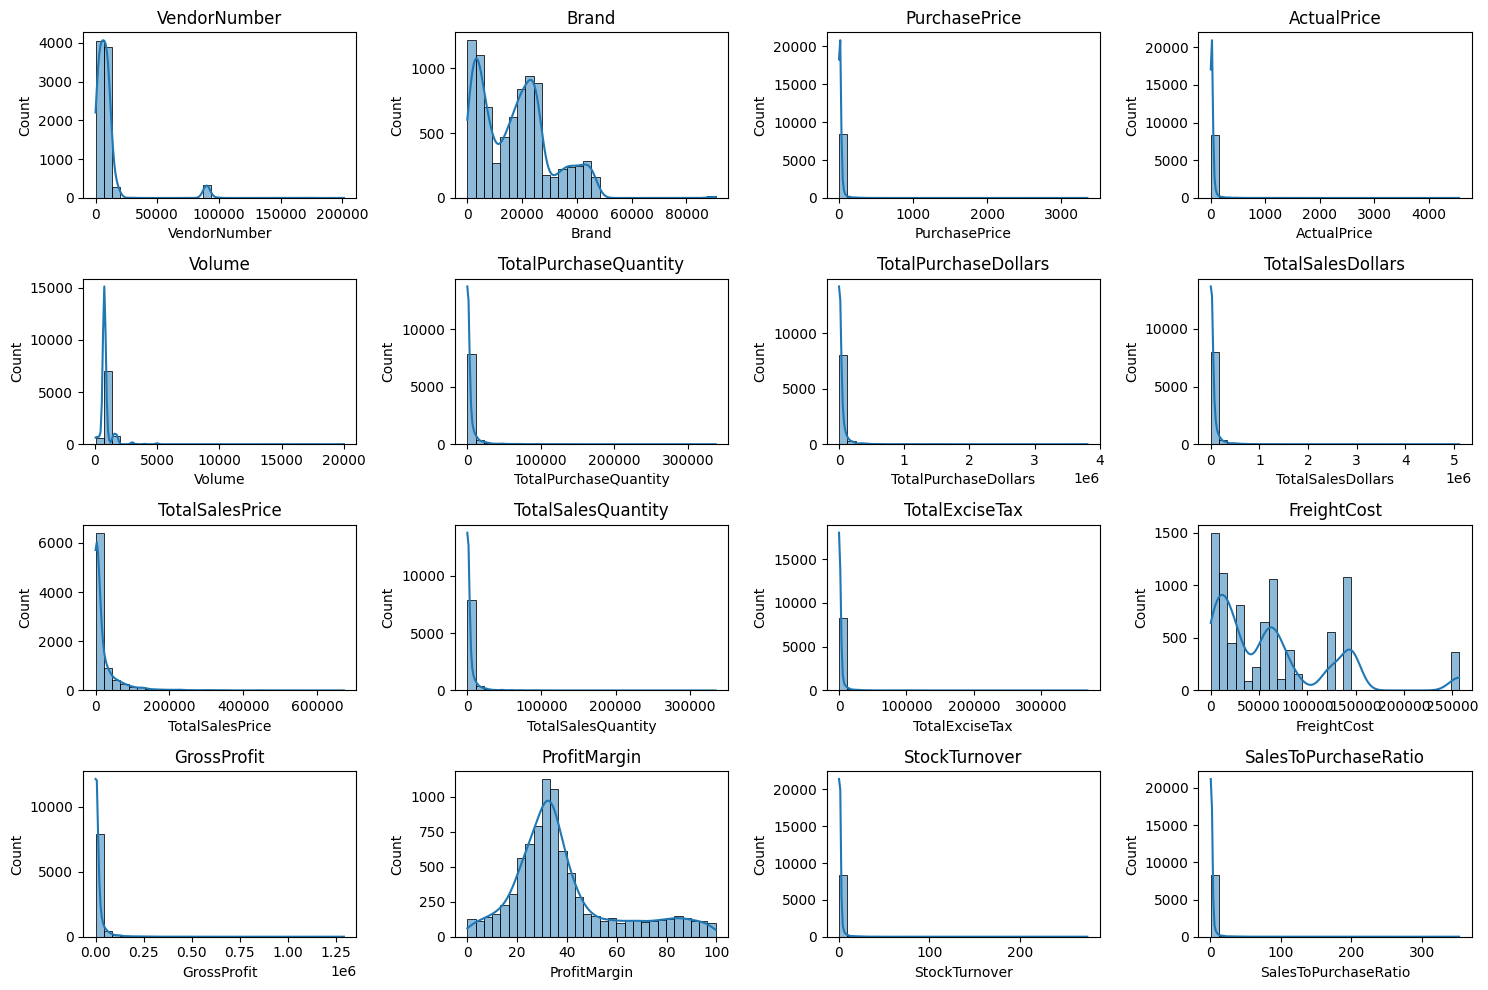

In [9]:
# Distribution Plots for Numerical Columns
numerical_col = df.select_dtypes(exclude = 'object').columns


n_cols = 4 # 4 plots per row
n_rows = math.ceil(len(numerical_col)/ n_cols) 
# Suppose: 10 nume_col 4 plots per row 10 / 4 = 2.5 → need 3 rows 

f,axes = plt.subplots(n_rows, n_cols, figsize=(15,10)) # fig → the entire figure | axes → grid of individual plots (subplots)
axes = axes.flatten() # make indexing easy Initially, axes is 2D (rows × columns).

for ax,col in zip(axes, numerical_col): # stops automatically when pair ends
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.set_title(col)

for ax in axes[len(numerical_col):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

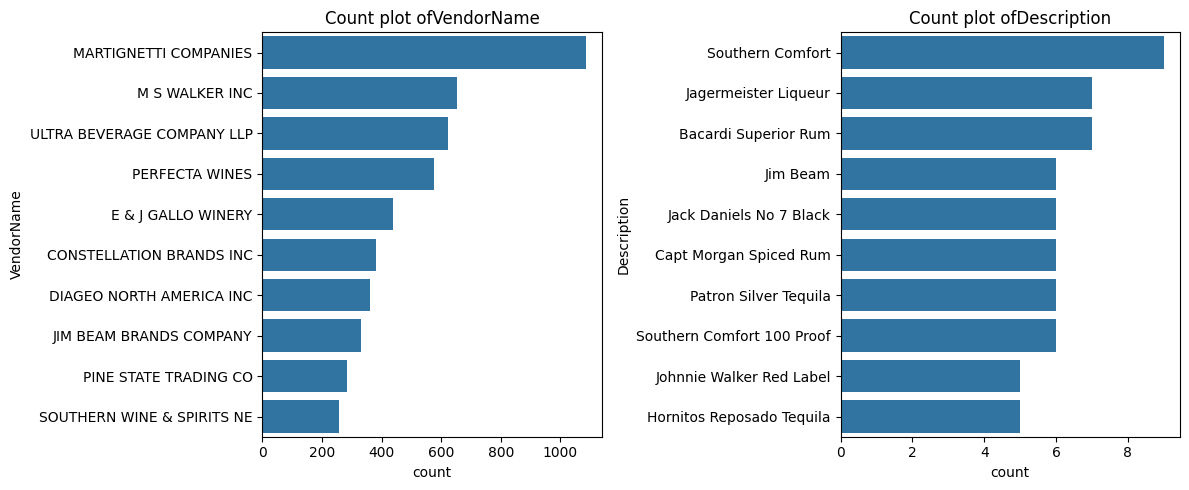

In [10]:
# Count plot for categorical Columns
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count plot of{col}")
plt.tight_layout()
plt.show()

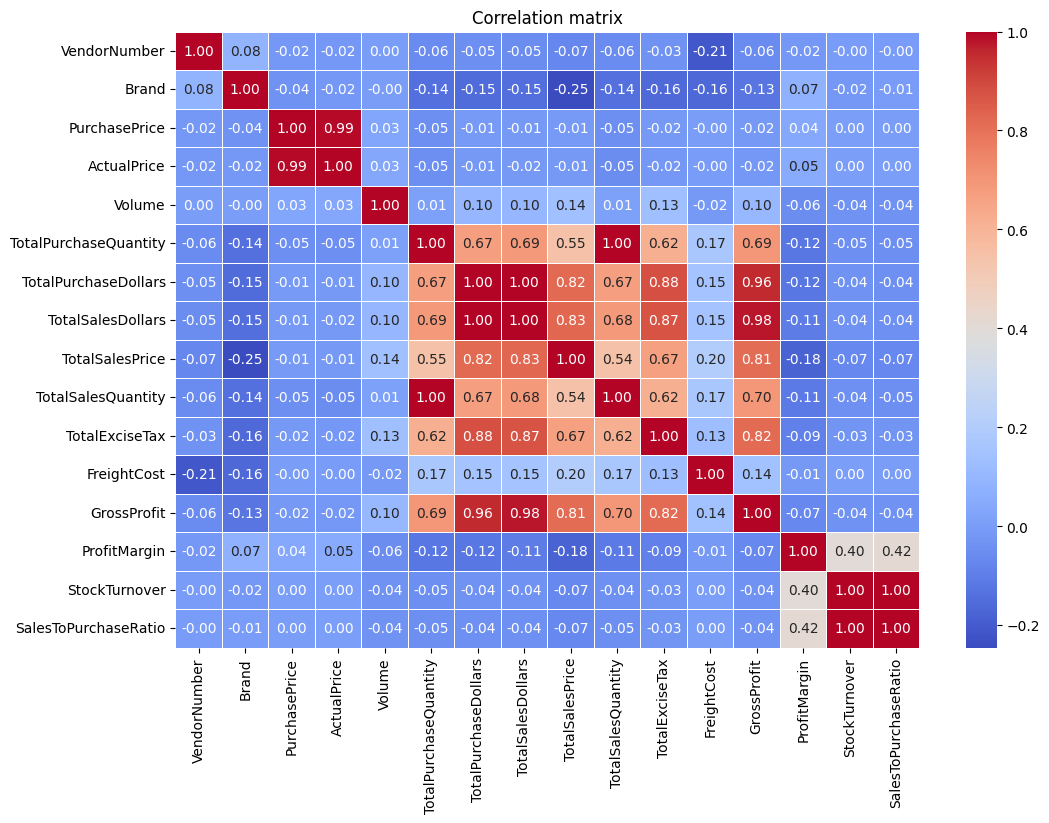

In [11]:
# Correlation HeatMap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_col].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths = 0.5)
plt.title('Correlation matrix')
plt.show()

### Correlation insights

* PurchasePrice has weak correlations with TotalSalesDollars(-0.012) and GrossProfit(-0.016) suggesting that price variations do not significantly impact sales revenue or profit.
* Strong correlation between total purchase quantity and total quantity(0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price(-0.179) suggests that as sales price increases, margin decrease, possibly due to competitive pricing pressures.
* StockTurnover has weak negative correlations with both GrossProfit(--0.038) and ProfitMargin(-0.055), indicating that faster does not necessarily reault in higher profitability.

# Data Analysis
- Answering acse study quesions
  
#### Identify Brands that needs Promotional or Pricing Adjustments which exihibit lower sales performance but higher profit margins

In [12]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin' : 'mean'
}).reset_index()

In [13]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

np.float64(560.299)

In [15]:
high_margin_threshold

np.float64(64.97017552750113)

In [19]:
# Filter brands with low sales but high profit Margin
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print('Brands with low sales but high profit margin:')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [20]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] # for better visualization

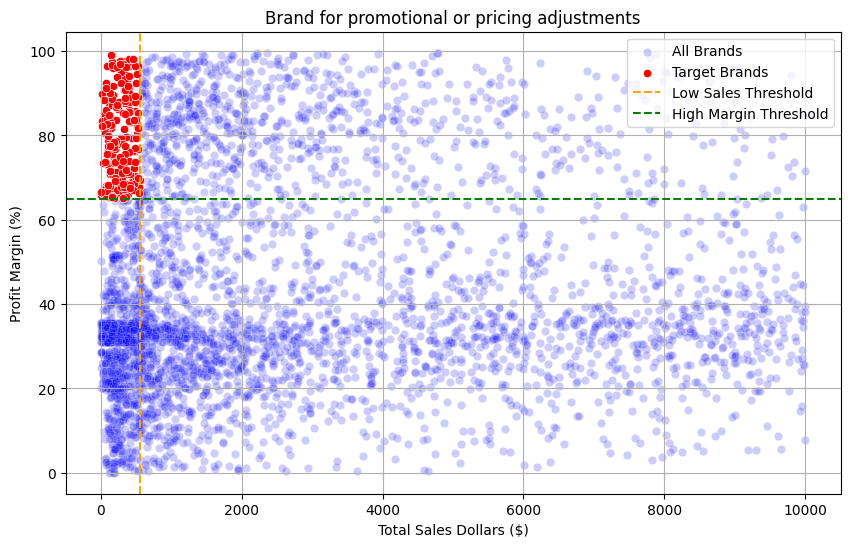

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

# Vertical line → Low sales threshold
plt.axvline(
    x=low_sales_threshold,
    color='orange',
    linestyle='--',
    linewidth=1.5,
    label='Low Sales Threshold'
)

# Horizontal line → High margin threshold
plt.axhline(
    y=high_margin_threshold,
    color='green',
    linestyle='--',
    linewidth=1.5,
    label='High Margin Threshold'
)

plt.xlabel('Total Sales Dollars ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brand for promotional or pricing adjustments')

plt.legend()
plt.grid(True)
plt.show()

In [22]:
brand_performance.columns

Index(['Description', 'TotalSalesDollars', 'ProfitMargin'], dtype='object')

In [23]:
brand_performance['Description'] = brand_performance['Description'].str.strip()
brand_performance['TotalSalesDollars'] = pd.to_numeric(brand_performance['TotalSalesDollars'], errors='coerce')
brand_performance['ProfitMargin'] = pd.to_numeric(brand_performance['ProfitMargin'], errors='coerce')
brand_performance.fillna(0, inplace=True)

cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS brand_performance")
cursor.execute("""
CREATE TABLE brand_performance (
    Description VARCHAR(100) ,
    TotalSalesDollars DECIMAL(15,2),    
    ProfitMargin DECIMAL(10,2)    
)
""")


In [24]:
conn.commit()

brand_performance.to_sql(
    "brand_performance",
    conn,
    if_exists="replace",
    index=False
)

4162

In [25]:
brand_performance.to_csv("data/brand_performance.csv", index=False)

#### Top vendors & Brands by Sales Performance

In [26]:
# Top Vendors & Brands By Sales Performance

top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [28]:
def format_dollars(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000: .2f}M'
    elif value >= 1_000:
        return f"{value / 1_000}K"
    else:
        return str(value)

In [29]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

In [30]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.33M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

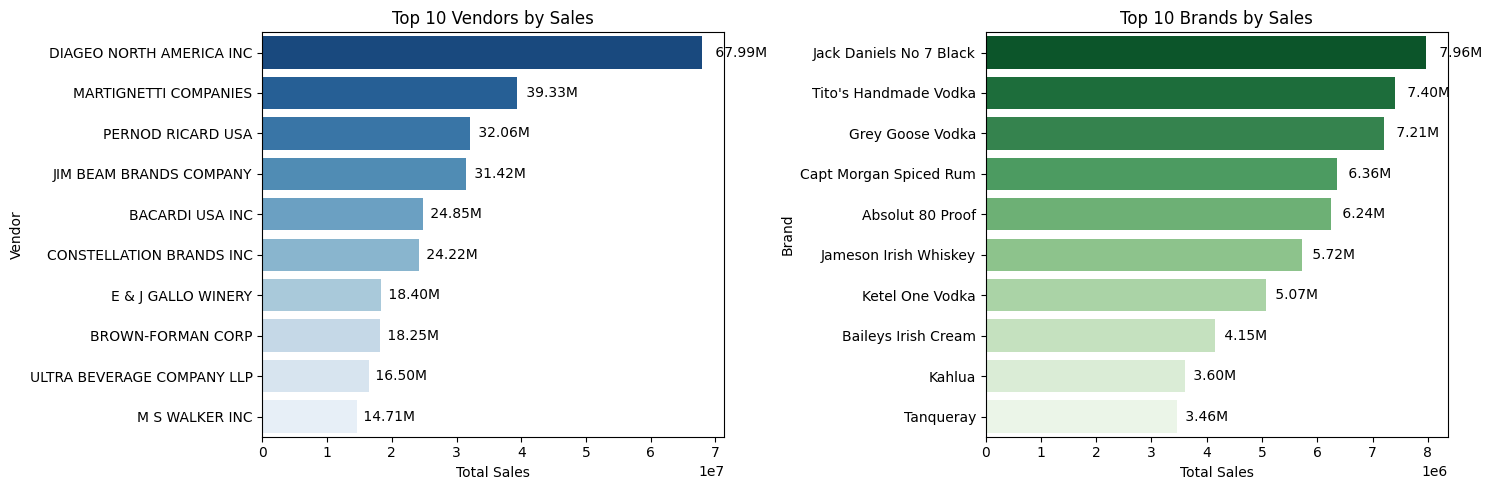

In [31]:
plt.figure(figsize=(15, 5))

# -------------------- Plot 1: Top Vendors --------------------
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette="Blues_r"
)

plt.title('Top 10 Vendors by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Vendor')

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )


# -------------------- Plot 2: Top Brands --------------------
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y=top_brands.index,
    x=top_brands.values,
    palette="Greens_r"
)

plt.title('Top 10 Brands by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Brand')

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


### Which vendors contribute the most to total purchase dollars?

In [32]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : "sum",
    "TotalSalesDollars" : "sum"
}).reset_index()

In [33]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100


In [34]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending =False), 2)


In [35]:
# Display Top 10 dollars
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(lambda x : format_dollars(x))
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(lambda x : format_dollars(x))
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(lambda x : format_dollars(x))
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [36]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [37]:
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


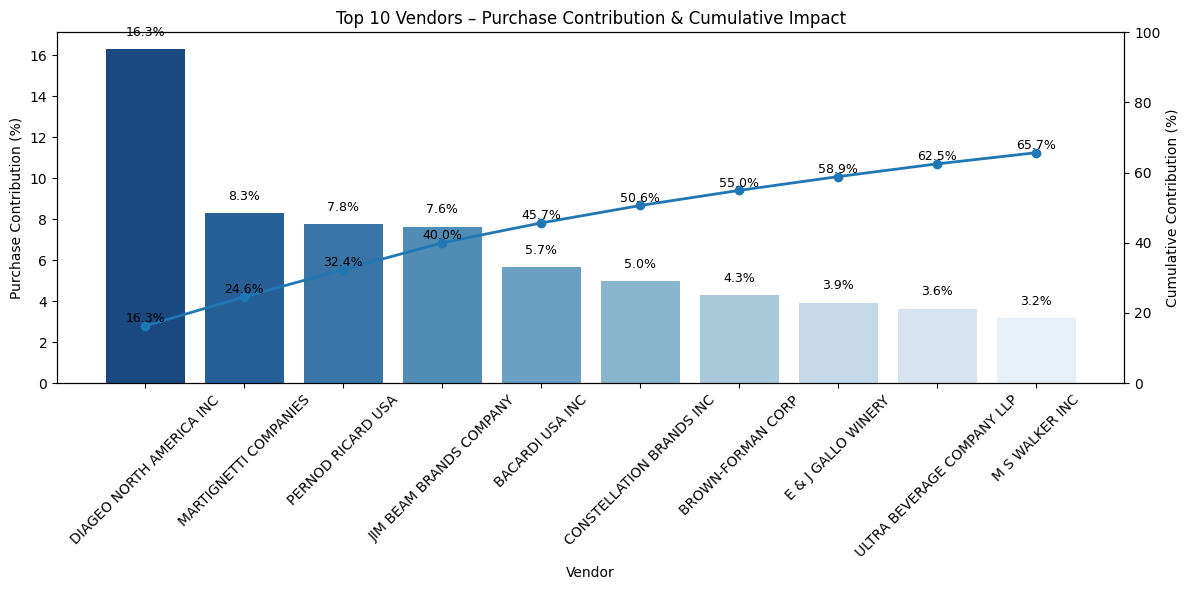

In [38]:
plt.figure(figsize=(12, 6))

ax1 = sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette='Blues_r'
)

ax1.set_ylabel('Purchase Contribution (%)')
ax1.set_xlabel('Vendor')
ax1.set_title('Top 10 Vendors – Purchase Contribution & Cumulative Impact')
ax1.tick_params(axis='x', rotation=45)

# Add percentage labels on bars
for bar in ax1.patches:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{bar.get_height():.1f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Second Y-axis for cumulative line
ax2 = ax1.twinx()

ax2.plot(
    top_vendors['VendorName'],
    top_vendors['CumulativeContribution%'],
    marker='o',
    linewidth=2
)

ax2.set_ylabel('Cumulative Contribution (%)')
ax2.set_ylim(0, 100)

# Add labels on cumulative points
for i, val in enumerate(top_vendors['CumulativeContribution%']):
    ax2.text(
        i,
        val + 1,
        f"{val:.1f}%",
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


In [39]:
vendor_performance.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContribution%'],
      dtype='object')

In [40]:
top_vendors.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContribution%',
       'CumulativeContribution%'],
      dtype='object')

In [41]:
vendor_performance['VendorName'] = vendor_performance['VendorName'].str.strip()
vendor_performance['TotalPurchaseDollars'] = pd.to_numeric(vendor_performance['TotalPurchaseDollars'], errors='coerce')
vendor_performance['TotalSalesDollars'] = pd.to_numeric(vendor_performance['TotalSalesDollars'], errors='coerce')
vendor_performance['PurchaseContribution%'] = pd.to_numeric(vendor_performance['PurchaseContribution%'], errors='coerce')
vendor_performance['GrossProfit'] = pd.to_numeric(vendor_performance['GrossProfit'], errors='coerce')
vendor_performance.fillna(0, inplace=True)

In [42]:
cursor.execute( """
CREATE TABLE vendor_performance(
    VendorName VARCHAR(100),
    TotalPurchaseDollars DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    TotalSalesDollars DECIMAL(15,2),
    PurchaseContribution DECIMAL(10,2)
)
""")
conn.commit()

vendor_performance.to_sql(
    "vendor_performance",
    conn,
    if_exists="replace",
    index=False
)

OperationalError: table vendor_performance already exists

In [43]:
vendor_performance.to_csv('data/vendor_performance.csv', index=False)

### How much of total procurements is dependent on the top vendors?

In [44]:
print(
    f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%"
)


Total Purchase Contribution of top 10 vendors is 65.69%


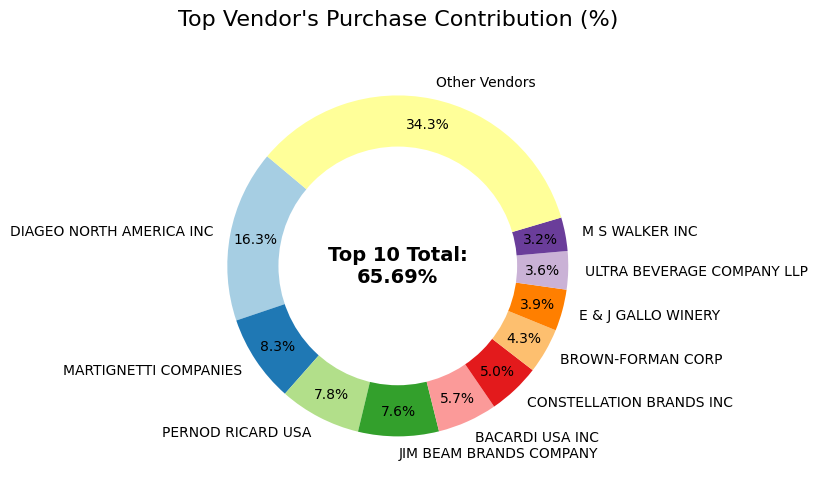

In [45]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Calculate the sum of the top vendors to find out what is left for "Others"
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" to the lists to ensure the chart represents 100%
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# --- STEP 3: Create the Donut Chart ---
# Set up the figure and axis with a square aspect ratio
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the base pie chart
# wedges: the slice objects, texts: the label objects, autotexts: the percentage text objects
wedges, texts, autotexts = ax.pie(
    purchase_contributions, 
    labels=vendors, 
    autopct='%1.1f%%',    # Format percentage to 1 decimal place
    startangle=140,       # Rotate start for better layout
    pctdistance=0.85,     # Distance of percentage text from center
    colors=plt.cm.Paired.colors # Use a built-in color palette
)

# --- STEP 4: Create the "Donut" Effect ---
# Create a white circle to place in the middle of the pie chart
# (0, 0) is the center, 0.70 is the radius (pie is 1.0)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

# Add the circle to the current axes
fig.gca().add_artist(centre_circle)

# --- STEP 5: Add Annotations and Title ---
# Place a summary text in the center of the donut hole
plt.text(
    0, 0, 
    f"Top {len(top_vendors)} Total:\n{total_contribution:.2f}%", 
    fontsize=14, 
    fontweight='bold', 
    ha='center', 
    va='center'
)

# Set the final title
plt.title("Top Vendor's Purchase Contribution (%)", pad=20, fontsize=16)

# Display the chart
plt.tight_layout()
plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal volume for cost savings?

In [46]:
df["UnitPurchasePrice"] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [47]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [48]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels =['Small', "Medium", "Large"])
# divided into 3 parts on the basis of quantiles

In [49]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


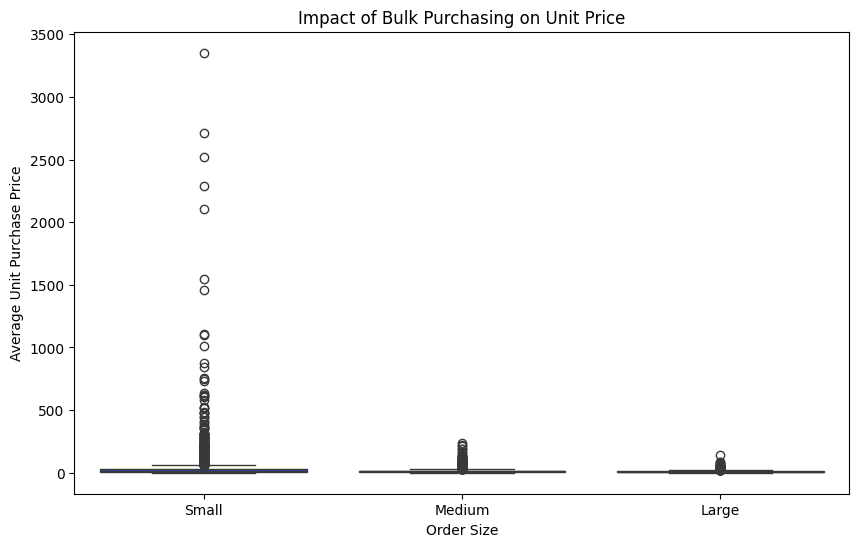

In [50]:
plt.figure( figsize=(10,6))
sns.boxplot(data=df, x ='OrderSize', y='UnitPurchasePrice', palette="winter")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

#### Insights
* Vendors buying in bulk (Large Order Size) get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price differnce between Small and Large orderss is substantial (~72% reduction in unit price cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turover, indicating excess stock and slow-moving products?

In [51]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [52]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small


### How much capital is locked in unsolved inventory per vendor, and which vendors contribute the most to it?

In [53]:
df['UnsoldInventoryValue'] = ( df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital:', format_dollars( df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:  2.71M


In [54]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the HIghesr Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.20905K
46,JIM BEAM BRANDS COMPANY,554.66563K
68,PERNOD RICARD USA,470.62561K
116,WILLIAM GRANT & SONS INC,401.96083000000004K
30,E & J GALLO WINERY,228.28261K
79,SAZERAC CO INC,198.43641K
11,BROWN-FORMAN CORP,177.73373999999998K
20,CONSTELLATION BRANDS INC,133.61762K
61,MOET HENNESSY USA INC,126.47769999999998K
77,REMY COINTREAU USA INC,118.59814999999999K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vndors

In [55]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [56]:
top_vendors = df[ df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[ df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [57]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [58]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    
    # Calculate Standard Error (SE): Standard Deviation divided by the square root of sample size
    # ddof=1 ensures we use the sample standard deviation formula
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    
    # Calculate the t-critical value based on the confidence level and degrees of freedom (n-1)
    # This determines how many standard errors wide the interval should be
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    
    # Margin of Error = Critical Value * Standard Error
    margin_of_error = t_critical * std_err
    
    # Return the mean, the lower bound, and the upper bound of the interval
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


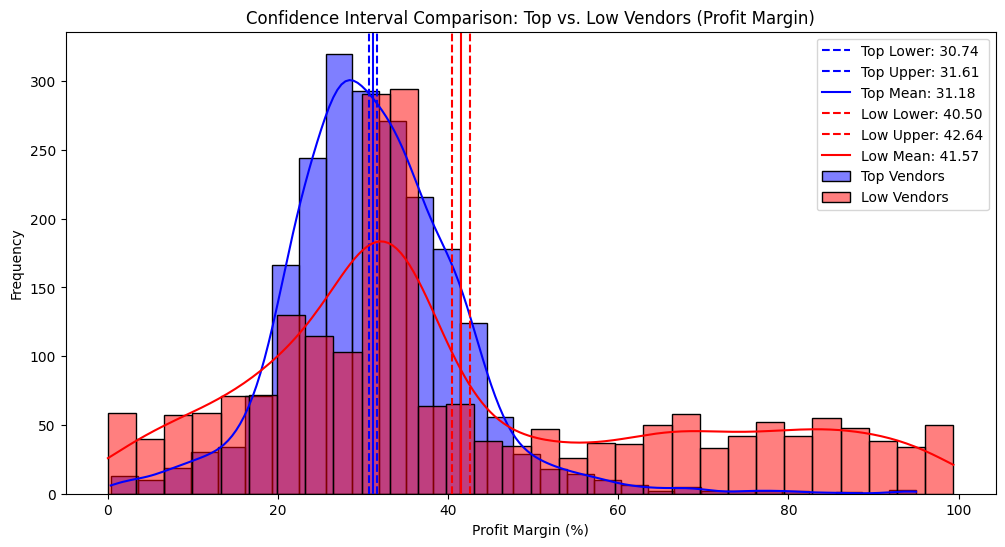

In [59]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)


print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
# Add vertical lines for Mean (solid) and CI Bounds (dashed)
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Plot Low Vendors similarly in red
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


* the confidence interval for low-performing vendors(40.48% to 42.62%) is significantly higher than that of top-perfroming vendors(30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
* For- HIgh Performinh Vendors: Of thry aim to improve profitability , they could explore selective price adjustments,cost optimization,or bundling strategies.
* For low-performing Vendors: Despite higher margins, their low sales volume indicate a need for better marketing, compettitive pricing, or improved distribution strategies.
* 

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1( Alternate Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

In [60]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. Define thresholds for 'Top' and 'Low' performing vendors
# We use the 75th percentile for high sales and 25th percentile for low sales
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# 2. Filter the Profit Margin data for both groups
# We extract the ProfitMargin column for rows meeting our sales criteria
# .dropna() is used to remove any missing values that would interfere with the t-test
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# 3. Perform Two-Sample T-Test (Welch's T-Test)
# equal_var=False performs Welch's t-test, which does not assume equal population variance
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# 4. Print and Interpret results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Significance level (alpha) is typically 0.05
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.


In [61]:
cursor = conn.cursor()

In [62]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('begin_inventory',), ('end_inventory',), ('purchases',), ('sales',), ('vendor_invoice',), ('purchase_prices',), ('vendor_sales_summary',), ('vendor_performance',), ('clean_vendor_data',), ('brand_performance',)]


In [63]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,...,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,...,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,...,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,...,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,...,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,...,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,...,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small,-3.96
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,...,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,...,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,...,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37


In [64]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesPrice',
       'TotalSalesQuantity', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio',
       'UnitPurchasePrice', 'OrderSize', 'UnsoldInventoryValue'],
      dtype='object')

In [65]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [66]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_cols] = df[numeric_cols].fillna(0)

for col in categorical_cols:
    df[col] = df[col].str.strip()
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

money_cols = [col for col in df.columns if "Price" in col or "Dollars" in col]

df[money_cols] = df[money_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

In [67]:
df['ProfitMargin'] = (
    df['GrossProfit'] /
    df['TotalSalesDollars'].replace(0, 1)
) * 100

In [68]:
df['RevenuePerUnit'] = (
    df['TotalSalesDollars'] /
    df['TotalSalesQuantity'].replace(0, 1)
)

In [69]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   VendorNumber           8564 non-null   int64   
 1   VendorName             8564 non-null   object  
 2   Brand                  8564 non-null   int64   
 3   Description            8564 non-null   object  
 4   PurchasePrice          8564 non-null   float64 
 5   ActualPrice            8564 non-null   float64 
 6   Volume                 8564 non-null   float64 
 7   TotalPurchaseQuantity  8564 non-null   int64   
 8   TotalPurchaseDollars   8564 non-null   float64 
 9   TotalSalesDollars      8564 non-null   float64 
 10  TotalSalesPrice        8564 non-null   float64 
 11  TotalSalesQuantity     8564 non-null   float64 
 12  TotalExciseTax         8564 non-null   float64 
 13  FreightCost            8564 non-null   float64 
 14  GrossProfit            8564 non-null   f

In [70]:
df.to_sql("clean_vendor_data", conn, if_exists="replace", index=False)

8564

In [71]:
df.to_csv("data/clean_vendor_data.csv", index=False)